In [1]:
#importing testing data
import pandas as pd  
import numpy as np
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
df = pd.read_csv("C:/Users/sangh/Documents/Anaconda_files/clean_tweets.csv")
df.head()

,Unnamed: 0,text,target
0,0,awww that bummer you shoulda got david carr of...,0
1,1,is upset that he can not update his facebook b...,0
2,2,dived many times for the ball managed to save ...,0
3,3,my whole body feels itchy and like its on fire,0
4,4,no it not behaving at all mad why am here beca...,0


In [2]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [3]:
df.to_csv('C:/Users/sangh/Documents/Anaconda_files/All_Tweets.csv',encoding='utf-8')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596041 entries, 0 to 1596040
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1596041 non-null  object
 1   target  1596041 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [5]:
df.head()

,text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [6]:
#Segmenting negative tweets
neg_tweets = df[df.target == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

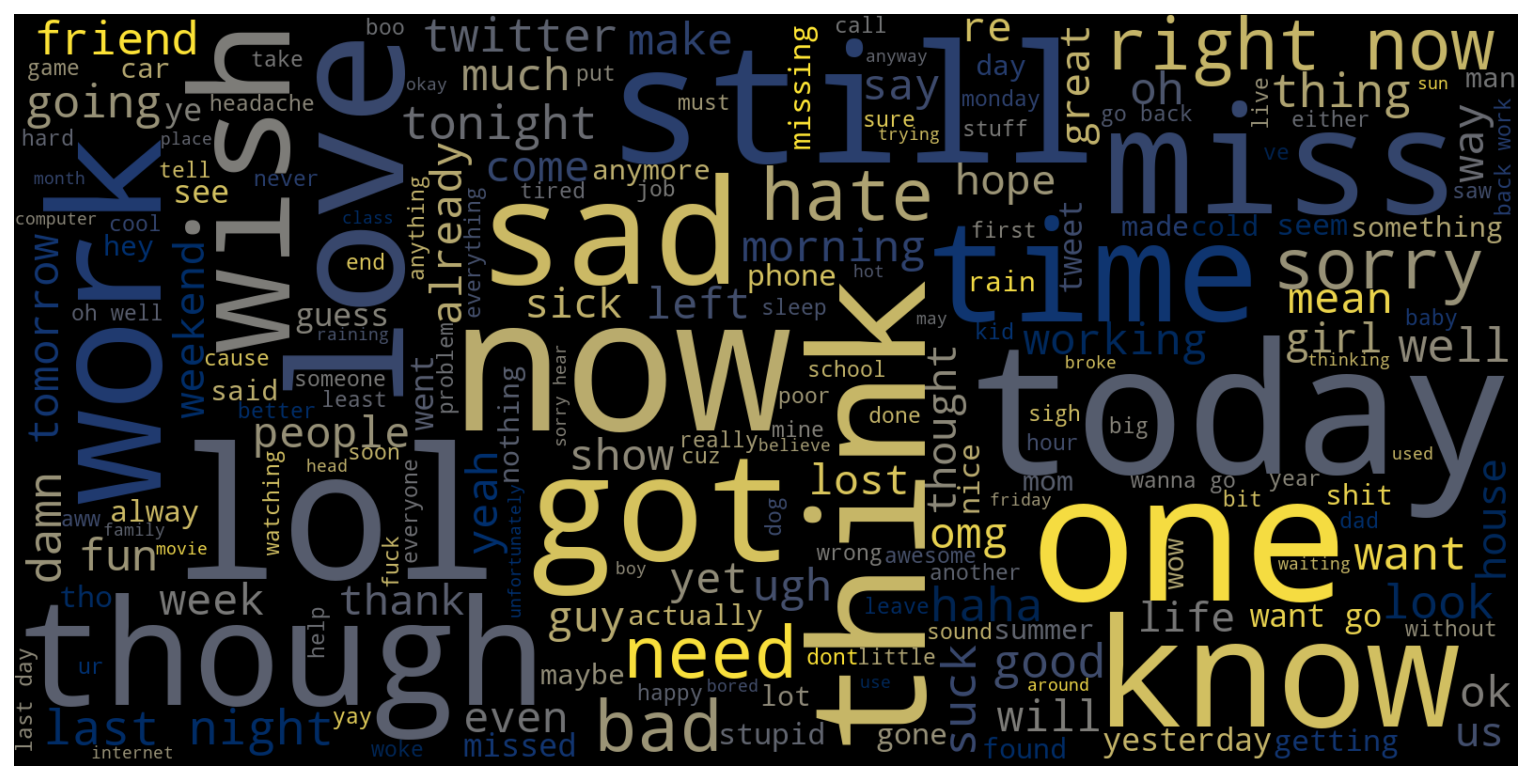

In [7]:
#analyzing word clouds negative 
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='cividis').generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
#segmenting positive tweets
pos_tweets = df[df.target == 1]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

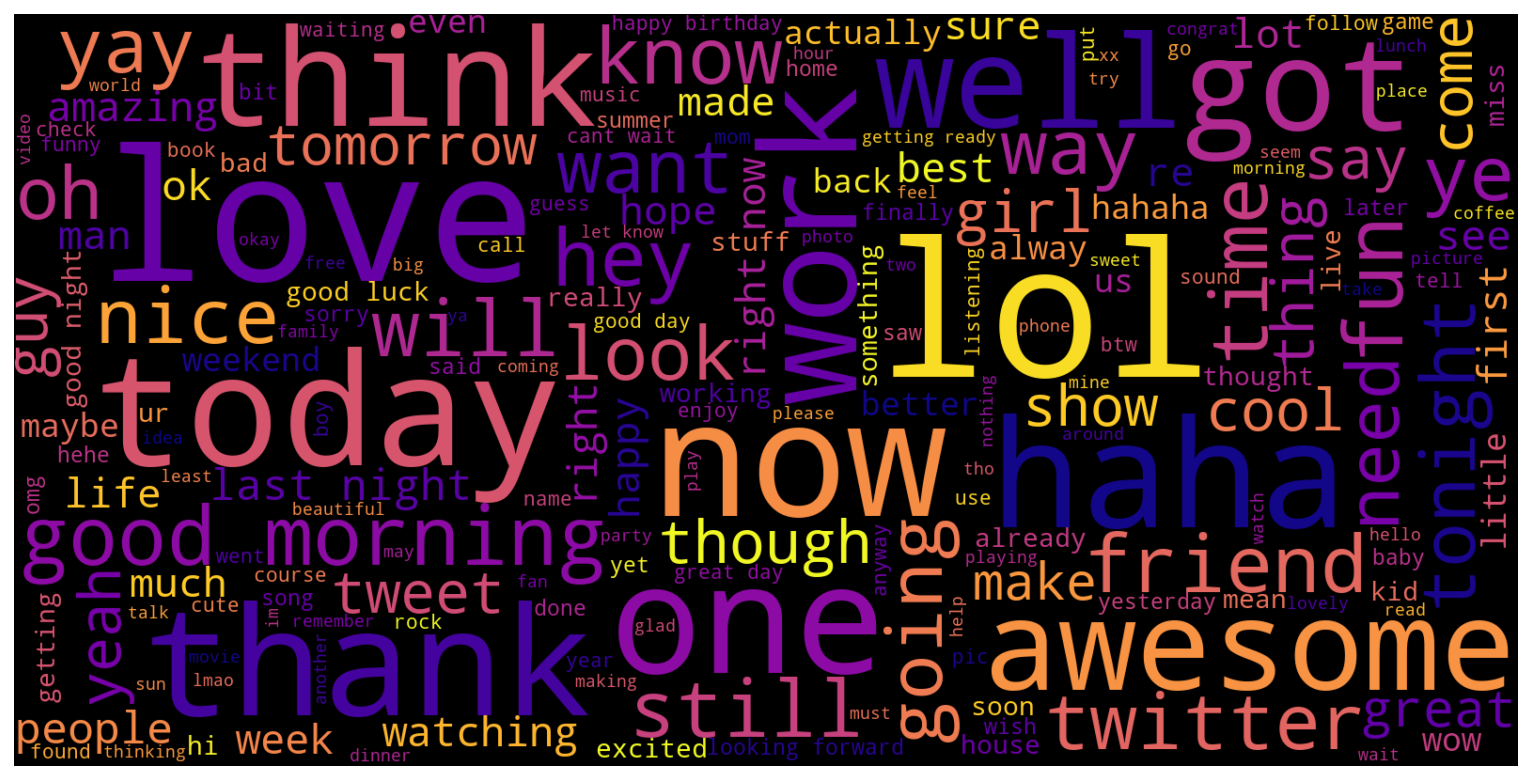

In [9]:
#analyzing word clouds negative
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='plasma').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
del pos_tweets, pos_string, neg_tweets, neg_string, wordcloud

In [11]:
#term frequency calculations 
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [12]:
len(cvec.get_feature_names())

264939

In [13]:
neg_doc_matrix = cvec.transform(df[df.target == 0].text)
pos_doc_matrix = cvec.transform(df[df.target == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [14]:
document_matrix = cvec.transform(df.text)

In [15]:
df[df.target == 0].tail()

,text,target
798192,sick spending my day laying in bed listening to,0
798193,gmail is down,0
798194,rest in peace farrah so sad,0
798195,sounds like rival is flagging your ads not muc...,0
798196,has to resit exams over summer wishes he worke...,0


In [16]:
%%time
neg_batches = np.linspace(0,798179,100).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(neg_batches)-2):
        print (neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

MemoryError: Unable to allocate 15.9 GiB for an array with shape (8062, 264939) and data type int64

In [17]:
df.tail()

,text,target
1596036,just woke up having no school is the best feel...,1
1596037,thewdb com very cool to hear old walt interviews,1
1596038,are you ready for your mojo makeover ask me fo...,1
1596039,happy th birthday to my boo of alll time tupac...,1
1596040,happy charitytuesday,1


In [19]:
%%time
pos_batches = np.linspace(798179,1596019,100).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(pos_batches)-2):
        print (pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

MemoryError: Unable to allocate 15.9 GiB for an array with shape (8058, 264939) and data type int64

In [20]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df.head()

ValueError: Shape of passed values is (2, 1), indices imply (2, 264939)

In [ ]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

In [ ]:
len(term_freq_df)

In [ ]:
term_freq_df.to_csv('term_freq_df.csv',encoding='utf-8')